___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Ingest the data to notebook

In [2]:
df = pd.read_csv('heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
19,69,0,3,140,239,0,1,151,0,1.800,2,2,2,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0
111,57,1,2,150,126,1,1,173,0,0.200,2,1,3,1
242,64,1,0,145,212,0,0,132,0,2.000,1,2,1,0
17,66,0,3,150,226,0,1,114,0,2.600,0,0,2,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df = df.astype({ "cp": str, "restecg":str, "slope":str, "thal":str})

In [7]:
df = pd.get_dummies(df, drop_first= True )

In [8]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.300,0,1,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,0,1,0,1,0,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,1,1,0,1,0,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,0,1,0,1,0,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,0,1,0,1,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   ca         303 non-null    int64  
 9   target     303 non-null    int64  
 10  cp_1       303 non-null    uint8  
 11  cp_2       303 non-null    uint8  
 12  cp_3       303 non-null    uint8  
 13  restecg_1  303 non-null    uint8  
 14  restecg_2  303 non-null    uint8  
 15  slope_1    303 non-null    uint8  
 16  slope_2    303 non-null    uint8  
 17  thal_1     303 non-null    uint8  
 18  thal_2     303 non-null    uint8  
 19  thal_3     303 non-null    uint8  
dtypes: float64

In [10]:
df.corr()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
age,1.000,-0.098,0.279,0.214,0.121,-0.399,0.097,0.210,0.276,-0.225,-0.147,-0.059,0.048,-0.161,0.085,0.177,-0.193,0.064,-0.136,0.111
sex,-0.098,1.000,-0.057,-0.198,0.045,-0.044,0.142,0.096,0.118,-0.281,-0.041,-0.117,0.088,-0.012,-0.108,-0.009,-0.014,0.141,-0.376,0.322
trestbps,0.279,-0.057,1.000,0.123,0.178,-0.047,0.068,0.193,0.101,-0.145,-0.082,-0.045,0.151,-0.147,0.059,0.025,-0.087,0.076,-0.141,0.110
chol,0.214,-0.198,0.123,1.000,0.013,-0.010,0.067,0.054,0.071,-0.085,-0.013,-0.038,-0.051,-0.174,0.035,0.051,-0.028,-0.094,-0.005,0.060
fbs,0.121,0.045,0.178,0.013,1.000,-0.009,0.026,0.006,0.138,-0.028,-0.061,0.084,0.056,-0.066,-0.048,-0.033,-0.020,0.091,-0.087,0.031
thalach,-0.399,-0.044,-0.047,-0.010,-0.009,1.000,-0.379,-0.344,-0.213,0.422,0.248,0.165,0.079,0.102,-0.121,-0.420,0.448,-0.160,0.295,-0.215
exang,0.097,0.142,0.068,0.067,0.026,-0.379,1.000,0.288,0.116,-0.437,-0.234,-0.271,-0.093,-0.094,0.043,0.258,-0.288,0.063,-0.329,0.300
oldpeak,0.210,0.096,0.193,0.054,0.006,-0.344,0.288,1.000,0.223,-0.431,-0.278,-0.132,0.087,-0.138,0.168,0.311,-0.511,0.105,-0.339,0.302
ca,0.276,0.118,0.101,0.071,0.138,-0.213,0.116,0.223,1.000,-0.392,-0.135,-0.089,-0.070,-0.090,0.031,0.142,-0.120,0.067,-0.221,0.204
target,-0.225,-0.281,-0.145,-0.085,-0.028,0.422,-0.437,-0.431,-0.392,1.000,0.246,0.317,0.087,0.175,-0.068,-0.362,0.394,-0.107,0.527,-0.486


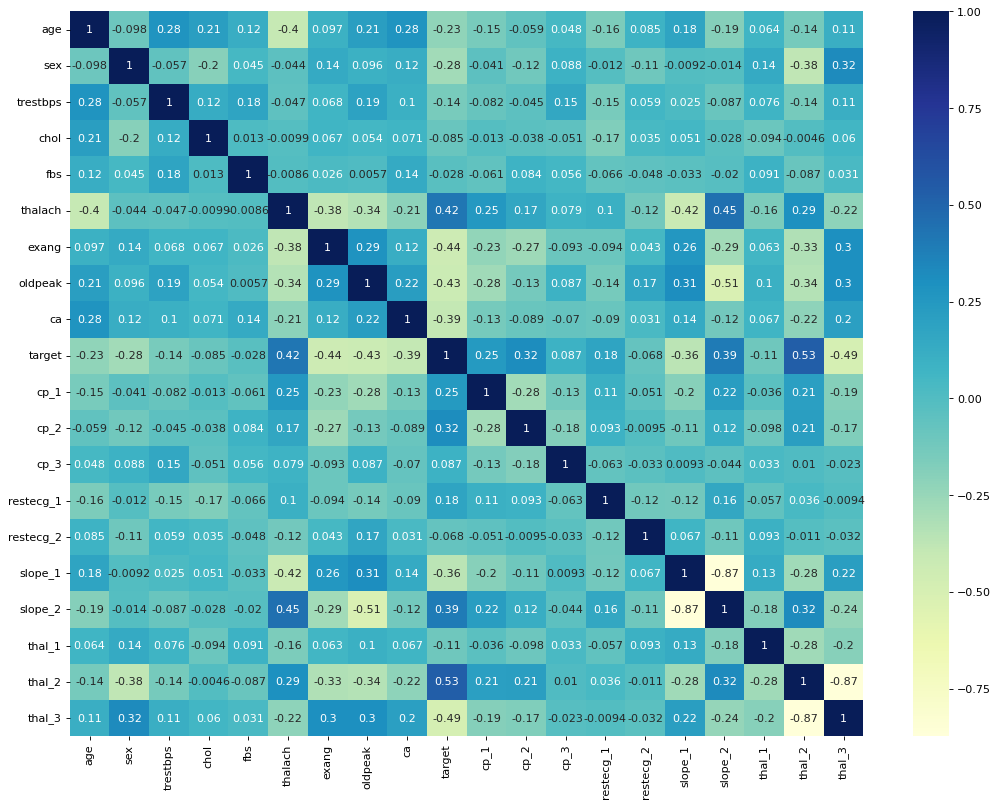

In [11]:
plt.figure(figsize=(16,12), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

<AxesSubplot:>

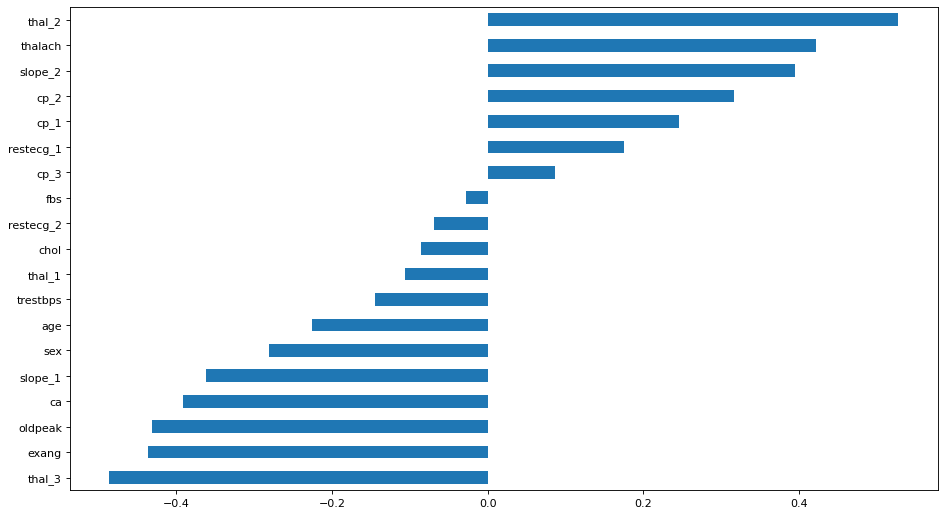

In [12]:
plt.figure(figsize=(14,8), dpi=80)
df.corr()["target"].drop("target").sort_values().plot.barh()

In [13]:
# sns.pairplot(df, hue = "target")

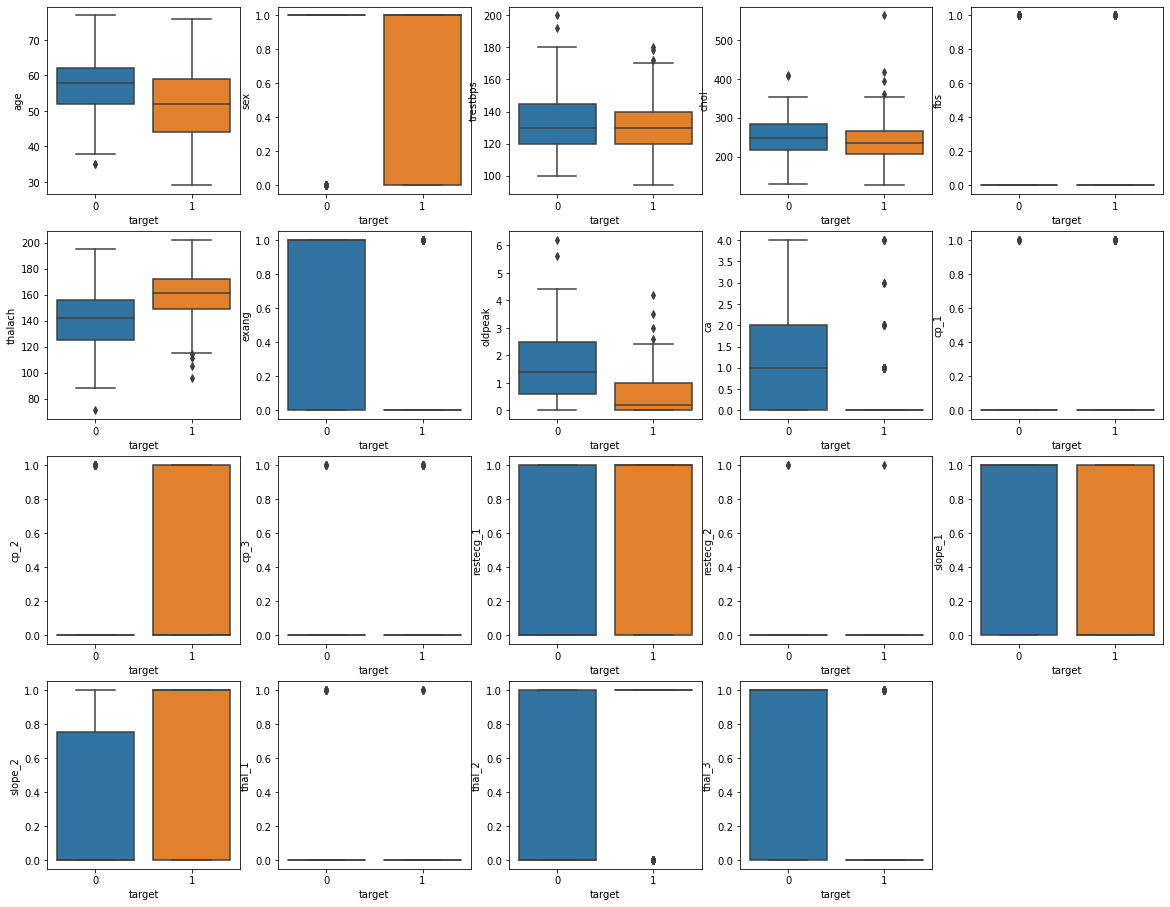

In [14]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(5,5,index)
        sns.boxplot(x = 'target', y = feature, data = df)
        

In [15]:
df_cont = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]
df_cont

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.300,1
1,37,130,250,187,3.500,1
2,41,130,204,172,1.400,1
3,56,120,236,178,0.800,1
4,57,120,354,163,0.600,1
...,...,...,...,...,...,...
298,57,140,241,123,0.200,0
299,45,110,264,132,1.200,0
300,68,144,193,141,3.400,0
301,57,130,131,115,1.200,0


# Data Preprocessing

In [16]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model=LogisticRegression()

In [23]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
y_pred=log_model.predict(X_test_scaled)

In [25]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [26]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred,pred_proba
12,49,1,130,266,0,171,0,0.600,0,1,...,1,0,0,1,0,1,0,1,1,0.916
157,35,1,122,192,0,174,0,0.000,0,1,...,1,0,0,1,0,1,0,1,1,0.949
228,59,1,170,288,0,159,0,0.200,0,0,...,0,0,1,0,0,0,1,0,0,0.350
142,42,0,120,209,0,173,0,0.000,0,0,...,1,0,1,0,0,1,0,1,1,0.963
240,70,1,160,269,0,112,1,2.900,1,0,...,1,0,1,0,0,0,1,0,0,0.134
202,58,1,150,270,0,111,1,0.800,0,0,...,0,0,0,1,0,0,1,0,0,0.107
186,60,1,130,253,0,144,1,1.400,1,0,...,1,0,0,1,0,0,1,0,0,0.160
151,71,0,112,149,0,125,0,1.600,0,0,...,1,0,1,0,0,1,0,1,1,0.796
217,63,1,130,330,1,132,1,1.800,3,0,...,0,0,0,1,0,0,1,0,0,0.032
62,52,1,118,186,0,190,0,0.000,0,0,...,0,0,1,0,1,0,0,1,1,0.745


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [29]:

eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 90  20]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.85      0.89      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



In [30]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  8],
       [ 5, 28]], dtype=int64)

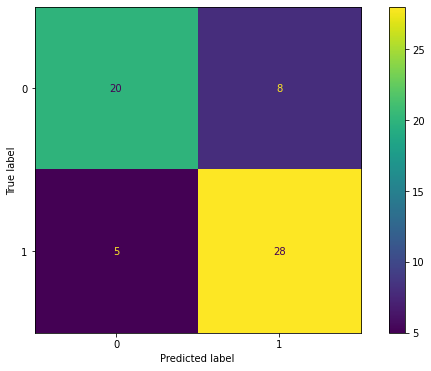

In [31]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

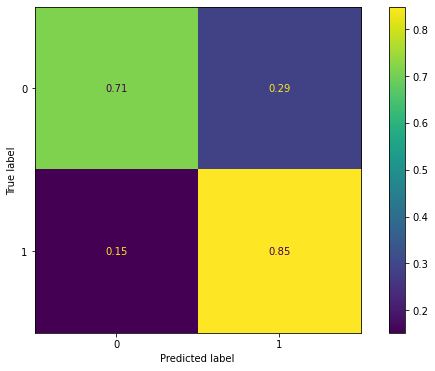

In [32]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

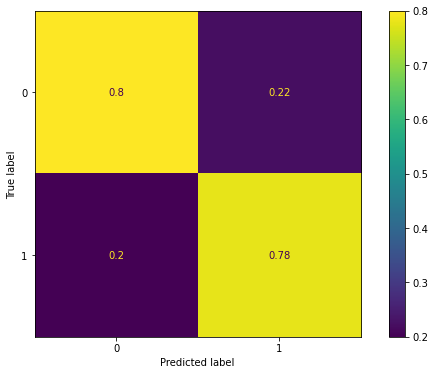

In [33]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [34]:
from sklearn.model_selection import cross_validate

In [35]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.013,0.003,0.857,0.857,0.857,0.840
2,0.007,0.008,0.733,0.786,0.759,0.720
3,0.007,0.004,0.786,0.846,0.815,0.792
4,0.010,0.002,0.867,1.000,0.929,0.917
5,0.008,0.003,0.923,0.923,0.923,0.917
6,0.006,0.002,0.733,0.846,0.786,0.750
7,0.008,0.003,0.917,0.846,0.880,0.875
8,0.006,0.003,0.909,0.769,0.833,0.833
9,0.006,0.003,0.917,0.846,0.880,0.875
10,0.007,0.002,0.867,1.000,0.929,0.917


In [36]:
df_scores.mean()[2:]

test_precision   0.851
test_recall      0.872
test_f1          0.859
test_accuracy    0.843
dtype: float64

In [37]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 90  20]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.85      0.89      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



# GridSearch for Logistic Regression:

In [38]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [39]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", 
                          n_jobs = -1)

In [40]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [41]:
grid_model.best_params_

{'C': 3.79269019073225,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [42]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# ROC/AUC for Logistic Regression:

In [43]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

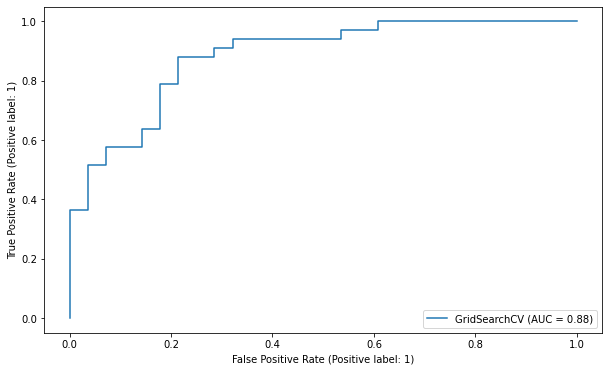

In [44]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

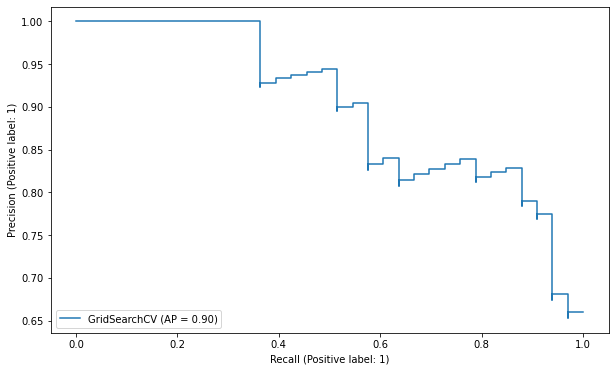

In [45]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

# Best Treshold for Logistic Regression:

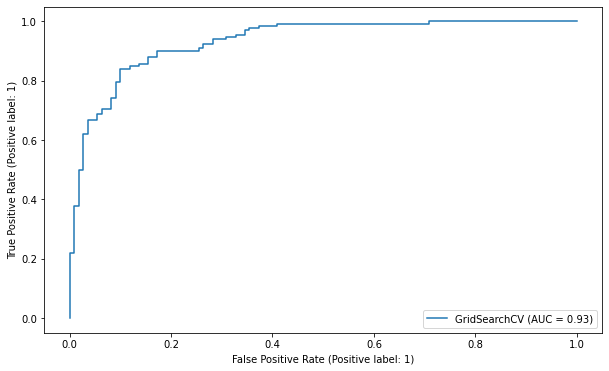

In [46]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [47]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9278236914600552

In [48]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [49]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6666528926844748

# Implement KNN and Evaluate

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [54]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [55]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.800,0.200
1,0.800,0.200
2,1.000,0.000
3,0.200,0.800
4,0.600,0.400
...,...,...
56,0.400,0.600
57,0.000,1.000
58,1.000,0.000
59,1.000,0.000


In [56]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [57]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
26,1,1,1.000,0.000
61,1,0,0.400,0.600
197,0,0,0.200,0.800
297,0,0,0.000,1.000
89,1,1,1.000,0.000
0,1,1,0.600,0.400
281,0,0,0.400,0.600
83,1,1,0.600,0.400
167,0,1,0.800,0.200
107,1,0,0.400,0.600


# Model Performance on Classification Tasks

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [59]:
confusion_matrix(y_test, y_pred)

array([[20,  8],
       [ 6, 27]], dtype=int64)

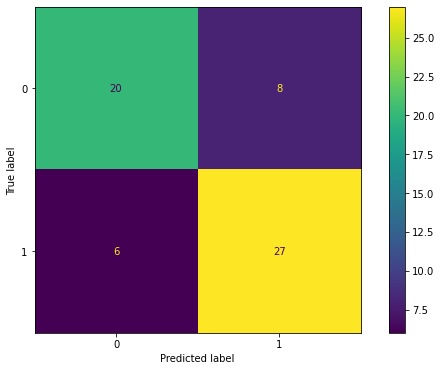

In [60]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# Elbow Method for Choosing Reasonable K Values

In [62]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [63]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [64]:
test_error_rates

[0.3114754098360656,
 0.3278688524590164,
 0.29508196721311475,
 0.2622950819672131,
 0.2295081967213115,
 0.2622950819672131,
 0.24590163934426235,
 0.2295081967213115,
 0.24590163934426235,
 0.2786885245901639,
 0.2622950819672131,
 0.2622950819672131,
 0.24590163934426235,
 0.2622950819672131,
 0.2295081967213115,
 0.24590163934426235,
 0.2295081967213115,
 0.2622950819672131,
 0.2295081967213115,
 0.2622950819672131,
 0.2295081967213115,
 0.2295081967213115,
 0.19672131147540983,
 0.2295081967213115,
 0.21311475409836067,
 0.2295081967213115,
 0.21311475409836067,
 0.21311475409836067,
 0.24590163934426235]

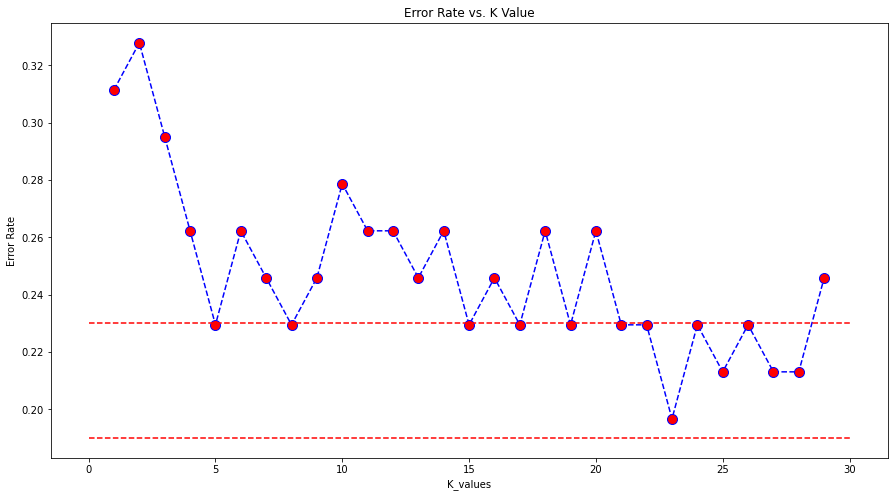

In [65]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.19, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.23, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [67]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set

[[21  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 98  12]
 [ 26 106]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.90      0.80      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.85      0.84       242
weighted avg       0.85      0.84      0.84       242



In [68]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[21  7]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[ 94  16]
 [ 24 108]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.87      0.82      0.84       132

    accuracy                           0.83       242
   macro avg       0.83      0.84      0.83       242
weighted avg       0.84      0.83      0.84       242



In [69]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train_scaled,y_train)
print('WITH K=23\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=23

Test_Set

[[21  7]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Train_Set

[[ 93  17]
 [ 21 111]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.84      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



# Cross Validate for Optimal K Value:

In [70]:
from sklearn.model_selection import cross_val_score, cross_validate

In [71]:
model = KNeighborsClassifier(n_neighbors=23)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.012,0.800,0.846,0.786,0.815
2,0.002,0.011,0.840,0.857,0.857,0.857
3,0.003,0.011,0.708,0.688,0.846,0.759
4,0.002,0.012,0.917,0.867,1.000,0.929
5,0.002,0.010,0.833,0.909,0.769,0.833
6,0.002,0.009,0.750,0.733,0.846,0.786
7,0.002,0.009,0.833,0.909,0.769,0.833
8,0.001,0.010,0.833,0.909,0.769,0.833
9,0.002,0.010,0.833,0.909,0.769,0.833
10,0.002,0.009,0.875,0.857,0.923,0.889


In [72]:
df_scores.mean()[2:]

test_accuracy    0.822
test_precision   0.848
test_recall      0.834
test_f1          0.837
dtype: float64

# Gridsearch Method for Choosing Reasonable K Values

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
knn_grid = KNeighborsClassifier()

In [75]:
k_values= range(1,30)

In [76]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [77]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [78]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [79]:
knn_grid_model.best_params_

{'n_neighbors': 29, 'p': 2, 'weights': 'distance'}

In [80]:
print('WITH K=29\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set

[[19  9]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [81]:
knn_model = KNeighborsClassifier(n_neighbors=23).fit(X_train_scaled, y_train)

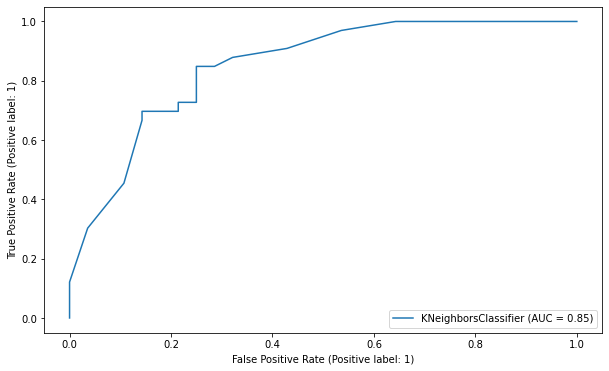

In [82]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

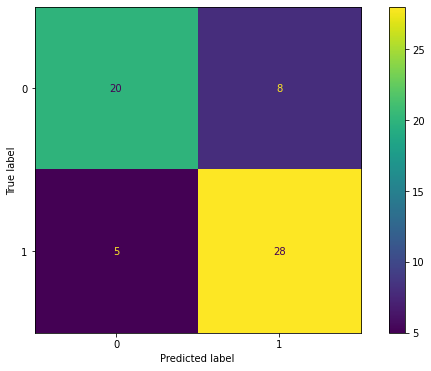

In [83]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

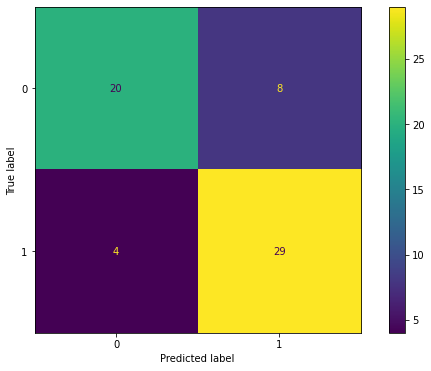

In [84]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

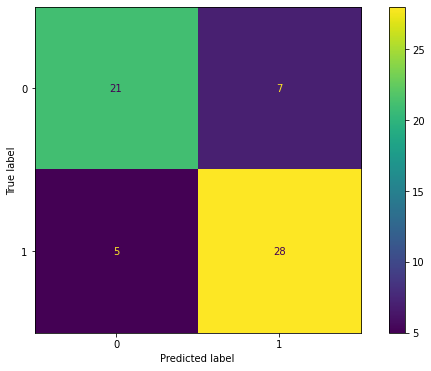

In [85]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [86]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set

[[ 90  20]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.85      0.89      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



In [87]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[20  8]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set

[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [88]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[21  7]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Train_Set

[[ 93  17]
 [ 21 111]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.84      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



# Chose best model and make a random prediction 

In [89]:
import pickle


In [90]:
scaler = StandardScaler().fit(X)
pickle.dump(scaler, open("scaler_heart", 'wb'))

<IPython.core.display.Javascript object>

In [91]:
X_scaled = scaler.transform(X)

In [92]:
final_model = LogisticRegression().fit(X_scaled, y)

In [93]:
pickle.dump(final_model, open("final_model", 'wb'))

# Make a random prediction 

In [94]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [95]:
X.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,131.624,246.264,0.149,149.647,0.327,1.040,0.729,0.165,0.287,0.076,0.502,0.013,0.462,0.469,0.059,0.548,0.386
std,9.082,0.466,17.538,51.831,0.356,22.905,0.470,1.161,1.023,0.372,0.453,0.265,0.501,0.114,0.499,0.500,0.237,0.499,0.488
min,29.000,0.000,94.000,126.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,120.000,211.000,0.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,1.000,130.000,240.000,0.000,153.000,0.000,0.800,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,1.000,140.000,274.500,0.000,166.000,1.000,1.600,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000
max,77.000,1.000,200.000,564.000,1.000,202.000,1.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [96]:
X.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
179,57,1,150,276,0,112,1,0.600,1,0,0,0,0,0,1,0,1,0,0
15,50,0,120,219,0,158,0,1.600,0,0,1,0,1,0,1,0,0,1,0
294,44,1,120,169,0,144,1,2.800,0,0,0,0,1,0,0,0,1,0,0
276,58,1,146,218,0,105,0,2.000,1,0,0,0,1,0,1,0,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,1,1,0,1,0,0,0,1
20,59,1,135,234,0,161,0,0.500,0,0,0,0,1,0,1,0,0,0,1
76,51,1,125,245,1,166,0,2.400,0,0,1,0,0,0,1,0,0,1,0
57,45,1,115,260,0,185,0,0.000,0,0,0,0,0,0,0,1,0,1,0
64,58,1,140,211,1,165,0,0.000,0,0,1,0,0,0,0,1,0,1,0
53,44,0,108,141,0,175,0,0.600,0,0,1,0,1,0,1,0,0,1,0


In [97]:
new_obs = {'age': [15, 21 ,38, 42, 56, 75, 82, 12, 34, 59],
           'sex': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
           'trestbps': [121, 131, 136, 140, 120, 150, 175, 172, 192, 100],
           'chol': [130, 148, 154, 196, 306, 448, 211, 346, 460, 500],
           'fbs': [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'thalach': [80, 200, 158, 95, 78, 186, 195, 148, 200, 98],
           'oldpeak': [3.3, 4.5, 0.7, 2.4, 3.7, 4.2, 5.7, 0.7, 6.1, 1.0],
           'ca' : [2.0, 1.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0],
           'cp_1': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
           'cp_2': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'cp_3': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
           'restecg_1': [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
           'restecg_2': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'exang_1': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
           'slope_1': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
           'slope_2': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           'thal_1': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
           'thal_2': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
           'thal_3': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}
           

In [98]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,trestbps,chol,fbs,thalach,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,15,0.000,121,130,0.000,80,3.300,2.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,21,0.000,131,148,1.000,200,4.500,1.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
2,38,1.000,136,154,1.000,158,0.700,4.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000
3,42,0.000,140,196,1.000,95,2.400,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,56,1.000,120,306,1.000,78,3.700,4.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5,75,1.000,150,448,0.000,186,4.200,3.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
6,82,0.000,175,211,0.000,195,5.700,2.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
7,12,1.000,172,346,0.000,148,0.700,3.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000
8,34,0.000,192,460,0.000,200,6.100,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
9,59,0.000,100,500,0.000,98,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [99]:
scaler_heart = pickle.load(open("scaler_heart", "rb"))

In [100]:
samples_scaled = scaler_heart.transform(samples)
samples_scaled

array([[-4.34166707, -1.46841752, -0.60675392, -2.24685838, -0.41763453,
        -3.04569256,  6.33933797,  0.82852939,  0.26508221, -0.44455422,
        -0.63464776,  3.4891135 , -1.00330579, -0.11566299,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-3.67993411, -1.46841752, -0.03562488, -1.8989997 ,  2.394438  ,
         2.20196803,  8.89787197, -0.03416616,  0.26508221, -0.44455422,
        -0.63464776, -0.28660575,  0.9967051 ,  8.64580823,  1.07902072,
        -0.93914194, -0.25131234, -1.10076284,  1.26085034],
       [-1.80502406,  0.68100522,  0.24993964, -1.78304681,  2.394438  ,
         0.36528682,  0.79584762,  2.55392051, -0.71442887,  2.24944438,
        -0.63464776,  3.4891135 , -1.00330579,  8.64580823,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-1.36386876, -1.46841752,  0.47839125, -0.97137655,  2.394438  ,
        -2.38973499,  4.42043746, -0.89686172,  0.26508221, -0.44455422,
        -0.634

In [101]:
final_model = pickle.load(open("final_model", "rb"))

In [102]:
predictions = final_model.predict(samples_scaled)
predictions_proba = final_model.predict_proba(samples_scaled)

In [103]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,age,sex,trestbps,chol,fbs,thalach,oldpeak,ca,cp_1,cp_2,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba
0,15,0.000,121,130,0.000,80,3.300,2.000,1.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0.195
1,21,0.000,131,148,1.000,200,4.500,1.000,1.000,0.000,...,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0,0.049
2,38,1.000,136,154,1.000,158,0.700,4.000,0.000,1.000,...,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1,0.692
3,42,0.000,140,196,1.000,95,2.400,0.000,1.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0.496
4,56,1.000,120,306,1.000,78,3.700,4.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.002
5,75,1.000,150,448,0.000,186,4.200,3.000,0.000,0.000,...,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.146
6,82,0.000,175,211,0.000,195,5.700,2.000,1.000,0.000,...,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.047
7,12,1.000,172,346,0.000,148,0.700,3.000,0.000,1.000,...,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0,0.160
8,34,0.000,192,460,0.000,200,6.100,1.000,1.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.017
9,59,0.000,100,500,0.000,98,1.000,0.000,0.000,1.000,...,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1,0.660
